Iteration 0: Cost 15.383525306641868
Iteration 100: Cost 7.169258842415684
Iteration 200: Cost 3.56489107872277
Iteration 300: Cost 1.9761951372135753
Iteration 400: Cost 1.2693178951857202
Iteration 500: Cost 0.9486578274621376
Iteration 600: Cost 0.7975612142159314
Iteration 700: Cost 0.721290338703232
Iteration 800: Cost 0.6783934532564924
Iteration 900: Cost 0.650710219628496

Optimal theta from Gradient Descent: [2.9589616  3.79905939]
Optimal theta from OLS: [4.21509616 2.77011339]


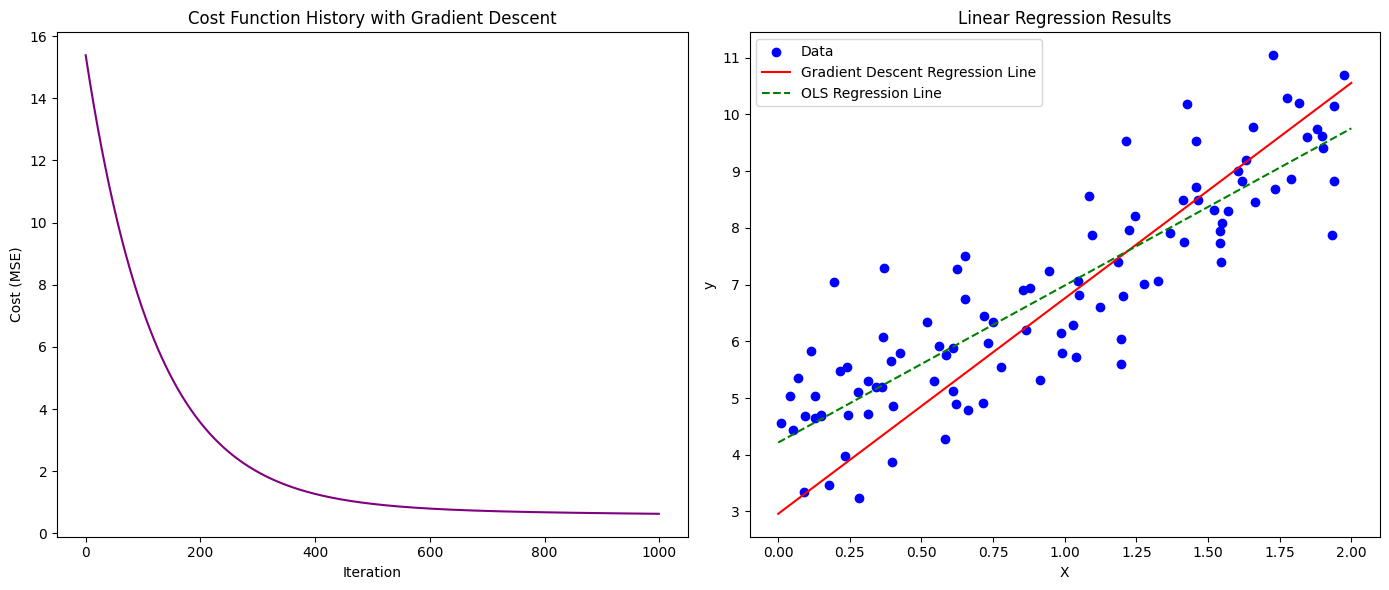

In [ ]:
"""
Aim:
    Compare Gradient Descent and Ordinary Least Squares (OLS) methods for performing linear regression.
Author:
    Dr. Huseyin Ozdemir
Date:
    2024-11-10
"""

import numpy as np
import matplotlib.pyplot as plt

# 1. Create Dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 2. Define Cost Function
def compute_cost(theta, X_b, y):
    m = len(y)
    predictions = X_b.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# 3. Gradient Descent Algorithm
def gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    theta = np.random.randn(2,1)  # Initialize parameters randomly

    cost_history = []

    for iteration in range(n_iterations):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost = compute_cost(theta, X_b, y)
        cost_history.append(cost)

        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Cost {cost}")

    return theta, cost_history

# 4. Compute OLS Estimate
def compute_ols(X, y):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    theta_ols = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_ols

# 5. Train with Gradient Descent
theta_gd, cost_history = gradient_descent(X, y, learning_rate=0.001, n_iterations=1000) # Change learning rate 0.1 to reach optimum coefficients
print(f"\nOptimal theta from Gradient Descent: {theta_gd.ravel()}")

# 6. Compute OLS Estimate
theta_ols = compute_ols(X, y)
print(f"Optimal theta from OLS: {theta_ols.ravel()}")

# 7. Visualize Results
plt.figure(figsize=(14,6))

# a. Cost Function History
plt.subplot(1,2,1)
plt.plot(cost_history, color='purple')
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function History with Gradient Descent")

# b. Data and Regression Lines
plt.subplot(1,2,2)
plt.scatter(X, y, color='blue', label='Data')
# Gradient Descent Regression Line
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict_gd = X_new_b.dot(theta_gd)
plt.plot(X_new, y_predict_gd, color='red', label='Gradient Descent Regression Line')
# OLS Regression Line
y_predict_ols = X_new_b.dot(theta_ols)
plt.plot(X_new, y_predict_ols, color='green', linestyle='--', label='OLS Regression Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Results")
plt.legend()

plt.tight_layout()
plt.show()
